In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.font_manager as fm
from scipy.signal import argrelextrema
from string import capwords

episodesdf = pd.read_csv('../data/simpsons_episodes.csv')
linesdf = pd.read_csv('../data/simpsons_script_lines.csv')

C:\Users\jseme\Anaconda3\envs\KagglePractice\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning:

Columns (4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.



In [14]:
linesdf = linesdf[linesdf['speaking_line']==True]
linesdf.drop(columns=['id', 'episode_id', 'number', 'timestamp_in_ms', 'speaking_line', 'character_id', 'location_id', 'raw_text', 'spoken_words', 'normalized_text'], inplace=True)
linesdf.head()

,raw_character_text,raw_location_text,word_count
0,Miss Hoover,Springfield Elementary School,31
1,Lisa Simpson,Springfield Elementary School,3
2,Miss Hoover,Springfield Elementary School,22
3,Lisa Simpson,Springfield Elementary School,5
4,Edna Krabappel-Flanders,Springfield Elementary School,33


In [15]:
episodesdf['season'] = episodesdf['season'].apply(lambda x: 'S'+str(x).zfill(2))
episodesdf['number_in_season'] = episodesdf['number_in_season'].apply(lambda x: 'E'+str(x).zfill(2))
episodesdf['code'] = episodesdf[['season', 'number_in_season']].agg(''.join, axis=1)
episodesdf.drop(columns=['id', 'number_in_season', 'number_in_series', 'original_air_year', 'production_code', 'season', 'video_url', 'views', 'imdb_votes'], inplace=True)
episodesdf.head()

,image_url,imdb_rating,original_air_date,title,us_viewers_in_millions,code
0,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1989-12-17,Simpsons Roasting on an Open Fire,26.7,S01E01
1,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1990-01-14,Bart the Genius,24.5,S01E02
2,http://static-media.fxx.com/img/FX_Networks_-_...,7.5,1990-01-21,Homer's Odyssey,27.5,S01E03
3,http://static-media.fxx.com/img/FX_Networks_-_...,7.8,1990-01-28,There's No Disgrace Like Home,20.2,S01E04
4,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1990-02-04,Bart the General,27.1,S01E05


In [16]:
print('Number of unique speakers is ', len(np.unique(linesdf['raw_character_text'].tolist())))

Number of unique speakers is  5406


In [17]:
linesdf['raw_character_text'] = linesdf['raw_character_text'].astype(str)
linesdf['raw_location_text'] = linesdf['raw_location_text'].astype(str)
linesdf = linesdf[linesdf['word_count'].astype(str).str.isdigit()]
linesdf['word_count'] = linesdf['word_count'].astype(int)
linesdf['raw_location_text'] = linesdf['raw_location_text'].apply(lambda x: capwords(x))
linesdf['raw_character_text'] = linesdf['raw_character_text'].apply(lambda x: capwords(x))
linesdf.head()

,raw_character_text,raw_location_text,word_count
0,Miss Hoover,Springfield Elementary School,31
1,Lisa Simpson,Springfield Elementary School,3
2,Miss Hoover,Springfield Elementary School,22
3,Lisa Simpson,Springfield Elementary School,5
4,Edna Krabappel-flanders,Springfield Elementary School,33


In [18]:
linesdf = linesdf.groupby(['raw_character_text', 'raw_location_text'], as_index=False).sum()
linesdf.head()

,raw_character_text,raw_location_text,word_count
0,"""for Dummies"" Author","""books For Dummies"" Section",9
1,"""just Stamp The Ticket"" Man",Parking Lot,3
2,"""just Stamp The Ticket"" Man",Springfield Swap Meet,9
3,"""just Stamp The Ticket"" Man",Stadium Box Office,15
4,"""mad"" Writer #1","""mad"" Building",8


In [19]:
#Create pie chart

speechdf = linesdf.drop(columns=['raw_location_text'])
speechdf = speechdf.groupby(['raw_character_text'], as_index=False).sum()

In [20]:
speechdf.sort_values(by='word_count', inplace=True, ignore_index=True, ascending=False)
speechdf.head()

,raw_character_text,word_count
0,Homer Simpson,630996
1,Lisa Simpson,347448
2,Marge Simpson,101571
3,Bart Simpson,89220
4,C. Montgomery Burns,29041


In [21]:
speechdf = speechdf[(speechdf['raw_character_text']!='Robert Pinsky') & (speechdf['raw_character_text']!='Abba')]
speechdf.head()

,raw_character_text,word_count
0,Homer Simpson,630996
1,Lisa Simpson,347448
2,Marge Simpson,101571
3,Bart Simpson,89220
4,C. Montgomery Burns,29041


In [22]:
speechdf = speechdf.head(20)

In [23]:
pie = px.pie(speechdf, values='word_count', names='raw_character_text', title='Spoken Lines of Simpsons Characters')
pie.write_html('../output/simpsonslinesspoken.html')

In [24]:
#Scatter plot

episodesdf.sort_values(by='original_air_date', inplace=True, ignore_index=True)


In [25]:
ratings = np.array(episodesdf['imdb_rating'])
max_indices = np.array(argrelextrema(ratings, np.greater, order=15))[0]
min_indices = np.array(argrelextrema(ratings, np.less, order=15))[0]


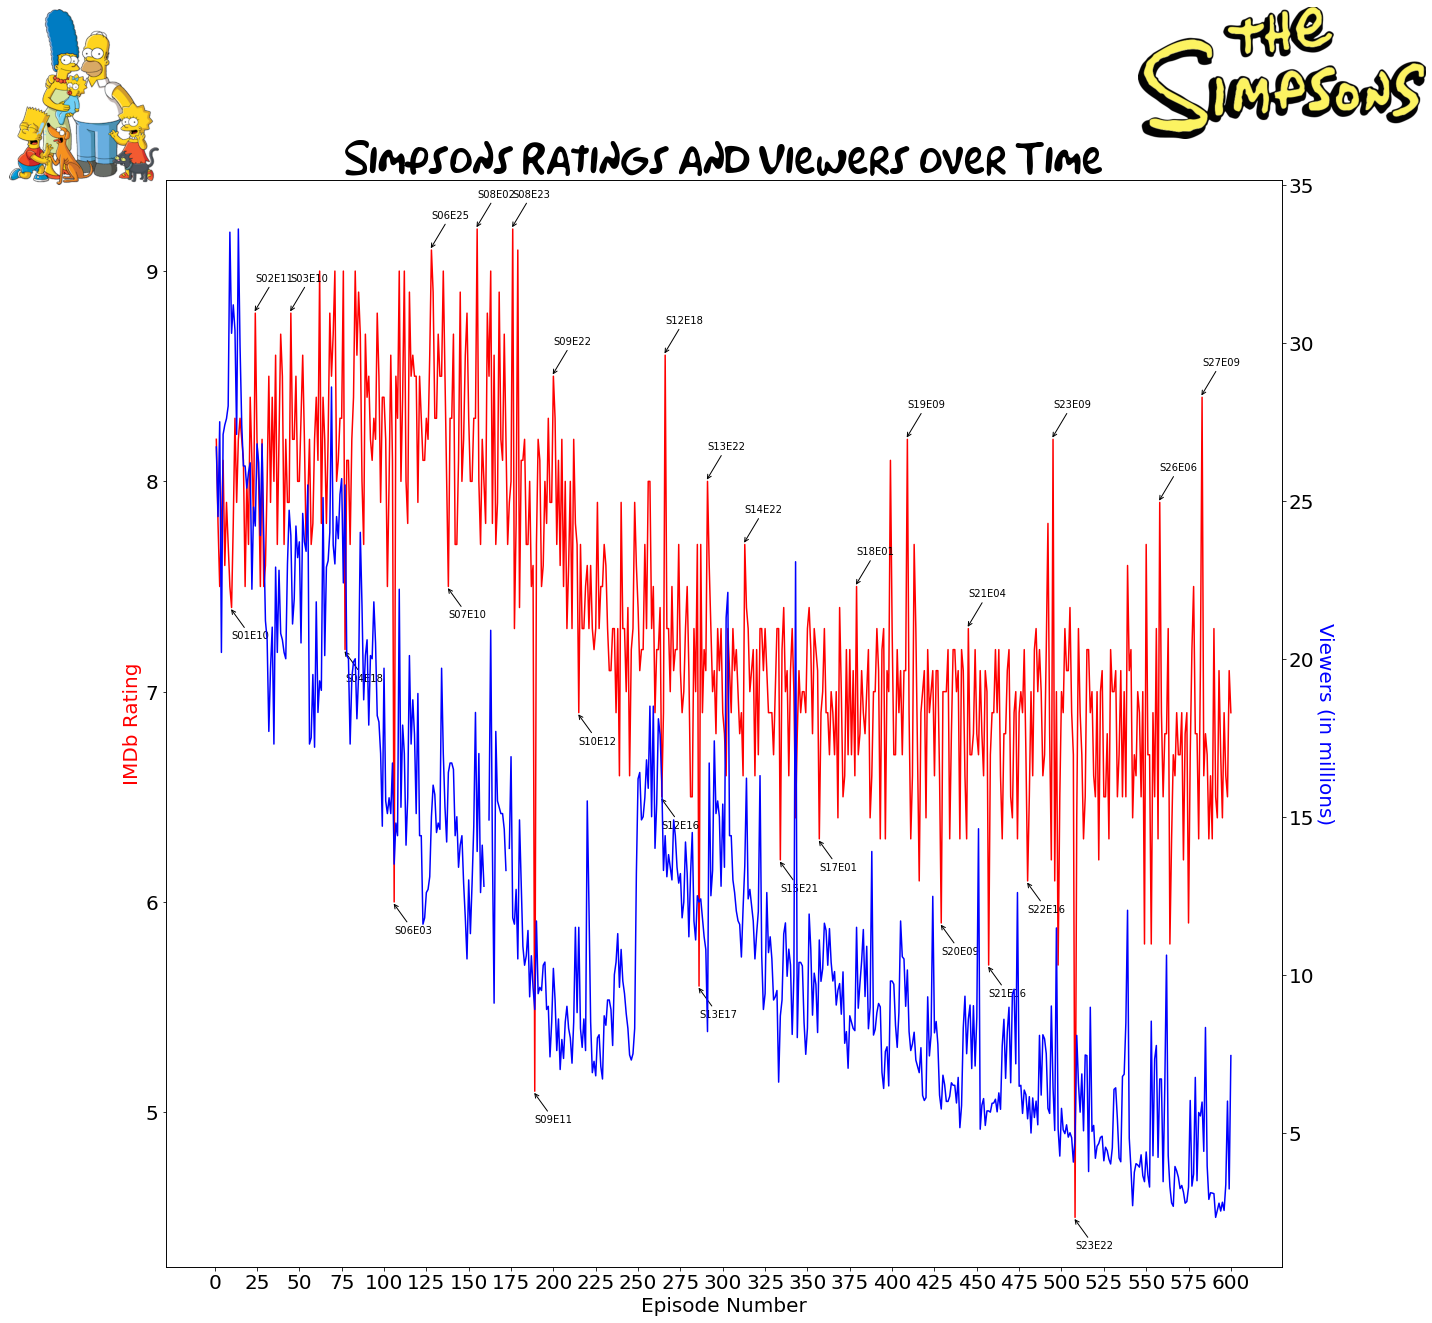

In [26]:

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

ax.plot(np.array(episodesdf.index)+1, episodesdf['imdb_rating'], 'r-')

ax1 = ax.twinx()

ax1.plot(np.array(episodesdf.index)+1, episodesdf['us_viewers_in_millions'], 'b-')
ax.set_xlabel('Episode Number', fontsize=20)
ax.set_ylabel('IMDb Rating', fontsize=20, color='r')
ax1.set_ylabel('Viewers (in millions)', fontsize=20, color='b', rotation=-90, labelpad=20)

ax.tick_params(labelsize=20)
ax.xaxis.set_ticks(np.arange(0, episodesdf.shape[0]+1, 25))
ax1.tick_params(labelsize=20)

for i in min_indices:
    ax.annotate(episodesdf.iat[i,episodesdf.shape[1]-1], (i, episodesdf.iat[i, 1]), xytext= (i+1, episodesdf.iat[i, 1]-0.15), arrowprops=dict(arrowstyle='->'), fontsize=10)


for i in max_indices:
    ax.annotate(episodesdf.iat[i,episodesdf.shape[1]-1], (i, episodesdf.iat[i, 1]), xytext = (i+1, episodesdf.iat[i, 1]+0.15), arrowprops=dict(arrowstyle='->'), fontsize=10)


simp_logo = mpimg.imread('../media/SimpsonsLogo.png')
simp_family = mpimg.imread('../media/Simpsons_FamilyPicture.png')

#[x position, y position, x size, y size]
imax = fig.add_axes([0.8, 0.8, 0.2, 0.2], anchor = 'NE')
imax1 = fig.add_axes([0.015, 0.875, 0.125, 0.125], anchor = 'NW')
imax.imshow(simp_logo)
imax1.imshow(simp_family)
imax.axis('off')
imax1.axis('off')

font = fm.FontProperties(fname='../media/simpsonfont/Simpsonfont-p07r.ttf', size = 40)

ax1.set_title('Simpsons Ratings and Viewers over Time', fontproperties=font)

plt.savefig('../output/SimpsonsRatings.png', dpi=221)

In [27]:
#Pivot data
linespivotdf = linesdf.pivot(index='raw_character_text', columns='raw_location_text', values='word_count')
linespivotdf = linespivotdf.fillna(0)
linespivotdf.head()

raw_location_text,"""all The Wrong Reasons"" Movie Theater","""books For Dummies"" Section","""curling For Loonies"" Set","""eye Caramba"" Examination Room","""family Matters"" Set","""gut Check With Homer Simpson"" Soundstage","""gut Check"" Set","""headbutt"" Set","""inception""-style Beach","""it Never Ends"" Set",...,Yiddle's Shop,Ymca Hallway,Yoga Class,Yogurt Nook,Youth Festival,Yuk-ingham Palace,Zero-g Jet,Zhengyici Theater,Ziff Estate,Zoo Entrance
raw_character_text,,,,,,,,,,,,,,,,,,,,,
"""for Dummies"" Author",0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""just Stamp The Ticket"" Man",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mad"" Writer #1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mad"" Writer #2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mario"" #2",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:

linespivotdf['sum'] = linespivotdf.sum(axis=1)
linespivotdf = linespivotdf.sort_values(by='sum', ascending=False).drop(columns=['sum'])
linespivotdf.head()

raw_location_text,"""all The Wrong Reasons"" Movie Theater","""books For Dummies"" Section","""curling For Loonies"" Set","""eye Caramba"" Examination Room","""family Matters"" Set","""gut Check With Homer Simpson"" Soundstage","""gut Check"" Set","""headbutt"" Set","""inception""-style Beach","""it Never Ends"" Set",...,Yiddle's Shop,Ymca Hallway,Yoga Class,Yogurt Nook,Youth Festival,Yuk-ingham Palace,Zero-g Jet,Zhengyici Theater,Ziff Estate,Zoo Entrance
raw_character_text,,,,,,,,,,,,,,,,,,,,,
Homer Simpson,0.0,0.0,0.0,10.0,0.0,133.0,198.0,3.0,21.0,1.0,...,0.0,0.0,0.0,15.0,13.0,0.0,56.0,51.0,21.0,10.0
Lisa Simpson,0.0,0.0,0.0,0.0,0.0,21.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marge Simpson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,8.0,0.0,...,0.0,0.0,4.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0
Bart Simpson,0.0,27.0,16.0,1.0,0.0,0.0,0.0,33.0,0.0,0.0,...,6.0,1.0,0.0,0.0,34.0,29.0,55.0,0.0,0.0,0.0
C. Montgomery Burns,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Sort columns by sum and take largest 10
linespivotdf = linespivotdf.reindex(linespivotdf.sum().sort_values().index, axis=1)
linespivotdf = linespivotdf.iloc[:, -10:]
linespivotdf.head()

raw_location_text,Simpson Car,Simpson Living Room,First Church Of Springfield,Springfield Town Hall,Kwik-e-mart,Springfield Nuclear Power Plant,Springfield Elementary School,Kitchen,Simpson Home,Moe's Tavern
raw_character_text,,,,,,,,,,
Homer Simpson,3046.0,2282.0,1315.0,1111.0,2082.0,6625.0,1446.0,701.0,78496.0,416991.0
Lisa Simpson,978.0,882.0,371.0,852.0,357.0,635.0,4507.0,117369.0,175607.0,540.0
Marge Simpson,1639.0,1331.0,966.0,574.0,620.0,272.0,847.0,469.0,47140.0,780.0
Bart Simpson,961.0,740.0,509.0,208.0,401.0,135.0,5943.0,197.0,27255.0,417.0
C. Montgomery Burns,1.0,204.0,186.0,219.0,32.0,6764.0,270.0,0.0,1414.0,166.0


In [30]:
linespivotdf = linespivotdf.head(10)
linespivotdf.head(10)

raw_location_text,Simpson Car,Simpson Living Room,First Church Of Springfield,Springfield Town Hall,Kwik-e-mart,Springfield Nuclear Power Plant,Springfield Elementary School,Kitchen,Simpson Home,Moe's Tavern
raw_character_text,,,,,,,,,,
Homer Simpson,3046.0,2282.0,1315.0,1111.0,2082.0,6625.0,1446.0,701.0,78496.0,416991.0
Lisa Simpson,978.0,882.0,371.0,852.0,357.0,635.0,4507.0,117369.0,175607.0,540.0
Marge Simpson,1639.0,1331.0,966.0,574.0,620.0,272.0,847.0,469.0,47140.0,780.0
Bart Simpson,961.0,740.0,509.0,208.0,401.0,135.0,5943.0,197.0,27255.0,417.0
C. Montgomery Burns,1.0,204.0,186.0,219.0,32.0,6764.0,270.0,0.0,1414.0,166.0
Moe Szyslak,89.0,66.0,153.0,415.0,66.0,0.0,97.0,14.0,2293.0,11111.0
Seymour Skinner,1.0,47.0,76.0,236.0,118.0,0.0,9670.0,18.0,414.0,417.0
Ned Flanders,73.0,100.0,922.0,124.0,230.0,60.0,199.0,36.0,3849.0,253.0
Krusty The Clown,2.0,89.0,109.0,216.0,57.0,21.0,208.0,28.0,2897.0,324.0


In [31]:
linespivotdf = linespivotdf.apply(lambda x: x/x.sum()*100)
linespivotdf = linespivotdf.T
linespivotdf.head(10)

raw_character_text,Homer Simpson,Lisa Simpson,Marge Simpson,Bart Simpson,C. Montgomery Burns,Moe Szyslak,Seymour Skinner,Ned Flanders,Krusty The Clown,Chief Wiggum
raw_location_text,,,,,,,,,,
Simpson Car,44.669306,14.342279,24.035782,14.092976,0.014665,1.305177,0.014665,1.070538,0.029330,0.425282
Simpson Living Room,39.714584,15.349809,23.163940,12.878524,3.550296,1.148625,0.817960,1.740341,1.548904,0.087017
First Church Of Springfield,28.328307,7.992245,20.809996,10.965101,4.006894,3.295993,1.637225,19.862128,2.348126,0.753985
Springfield Town Hall,26.452381,20.285714,13.666667,4.952381,5.214286,9.880952,5.619048,2.952381,5.142857,5.833333
Kwik-e-mart,49.856322,8.548851,14.846743,9.602490,0.766284,1.580460,2.825670,5.507663,1.364943,5.100575
Springfield Nuclear Power Plant,45.520132,4.363062,1.868902,0.927580,46.475196,0.000000,0.000000,0.412258,0.144290,0.288580
Springfield Elementary School,6.112873,19.053054,3.580638,25.123653,1.141408,0.410061,40.879307,0.841260,0.879307,1.978440
Kitchen,0.589755,98.743091,0.394572,0.165737,0.000000,0.011778,0.015143,0.030287,0.023557,0.026080
Simpson Home,22.990835,51.433852,13.806920,7.982766,0.414149,0.671601,0.121257,1.127341,0.848508,0.602771


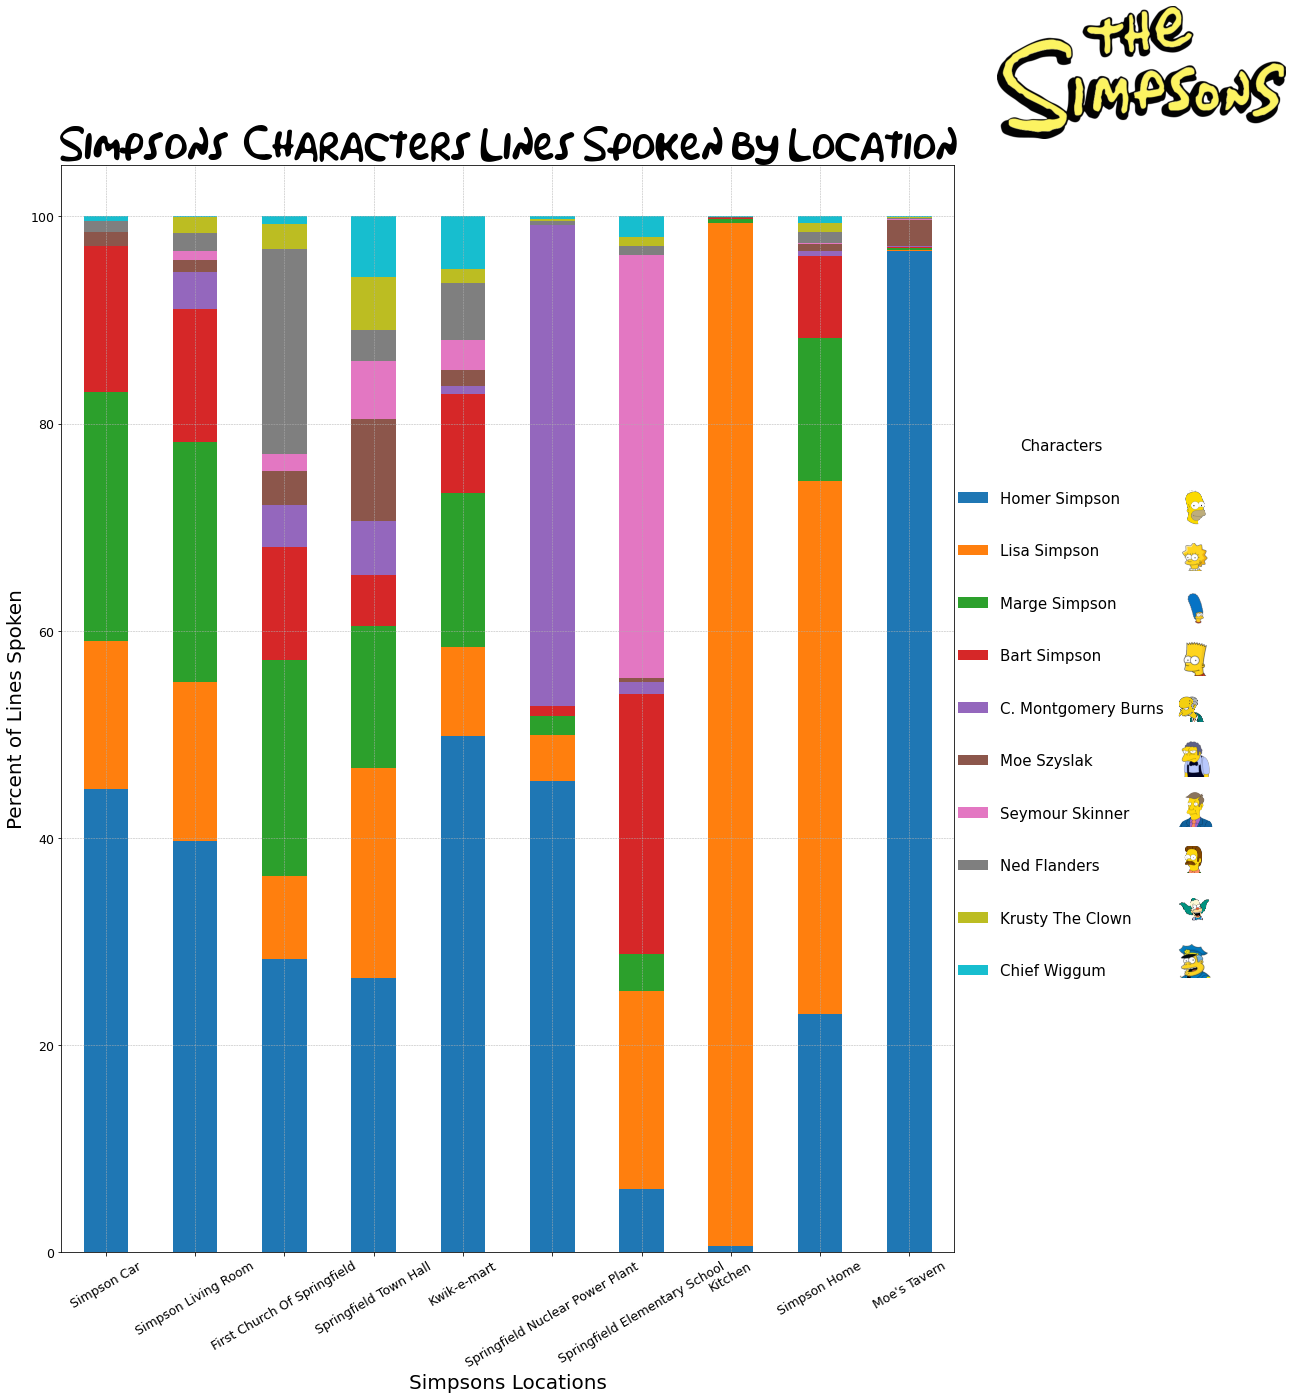

In [32]:
fig1 = plt.figure(figsize=(20, 20))
ax1 = fig1.add_subplot(111)

font1 = fm.FontProperties(fname='../media/simpsonfont/Simpsonfont-p07r.ttf', size = 40)


ax1.set_ylabel('Percent of Lines Spoken', fontsize=20)
ax1.set_title("Simpsons' Characters Lines Spoken by Location", fontproperties=font1)
linespivotdf.plot(ax=ax1, kind='bar', stacked=True)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width*0.8, box.height])
ax1.legend(loc='center right', bbox_to_anchor = (1.25,0.5), frameon=False, title='Characters', title_fontsize=15, fontsize=15, labelspacing=2.5)
ax1.set_xlabel('Simpsons Locations', fontsize=20)
ax1.set_xticklabels(labels=linespivotdf.index.values.tolist(), rotation=30, fontsize=12.5)
ax1.set_yticklabels(labels=np.arange(0,101,20), fontsize=12.5)

imax2 = fig1.add_axes([0.775, 0.79, 0.2, 0.2], anchor = 'NE')
imax2.imshow(simp_logo)
imax2.axis('off')

simpsons_chars = ['hs_head.png', 'ls_head.png', 'ms_head.png', 'bs_head.png', 'mb_head.png', 'mo_head.png', 'ss_head.png', 'nf_head.png', 'kk_head.png', 'cw_head.png']
directory = '../media/'
placement = 0.63
for head in simpsons_chars:
    char_head = mpimg.imread(directory+head, 0)
    imax3 = fig1.add_axes([0.9, placement, 0.025, 0.025])
    imax3.imshow(char_head)
    imax3.axis('off')
    placement-=0.035

ax1.grid(True, linestyle='dashed', linewidth=0.5)
fig1.savefig('../output/SimpsonsSpeech.png', dpi=221)